In [1]:
import cv2
import numpy as np
from collections import Counter
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

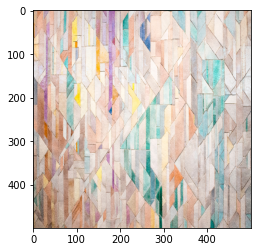

In [2]:
img=cv2.imread('/home/umar/ML-AI/OpenCV-Projects/Background-color-detector/picture3.jpg')
img=cv2.resize(img,(500,500))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [3]:
#Reshaping to make 2D matrix of all the points.

modified_img=img.reshape(img.shape[0]*img.shape[1],3)
print(modified_img)

[[124 159 199]
 [142 169 212]
 [144 171 206]
 ...
 [156 155 133]
 [138 134 115]
 [160 155 134]]


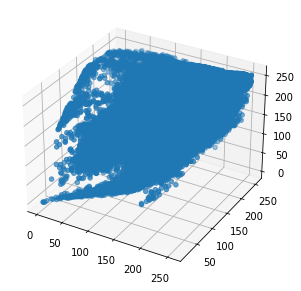

In [4]:
#plotting all the points in 3D space.

x=modified_img[:,0]
y=modified_img[:,1]
z=modified_img[:,2]
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection ='3d')
ax.scatter(x, y, z)
plt.show()

In [5]:
# Performing unpsupervised learning using K-Means

kmean=KMeans(n_clusters=10)
labels=kmean.fit_predict(modified_img)
#print(kmean.labels_)

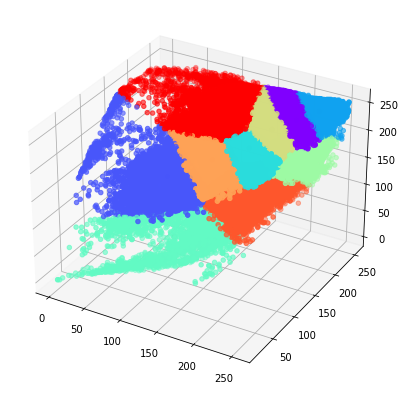

In [6]:
#Points as shown according to the labels of KMeans

x=modified_img[:,0]
y=modified_img[:,1]
z=modified_img[:,2]
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection ='3d')
ax.scatter(x, y, z, c=kmean.labels_, cmap='rainbow')
ax.scatter(kmean.cluster_centers_[:,0] ,kmean.cluster_centers_[:,1],kmean.cluster_centers_[:,2], color='black')
plt.show()

In [7]:
#Making frequency of each label set i.e count of no. of data-points in each label

count=Counter(labels)
count

Counter({7: 21010,
         9: 10285,
         3: 31018,
         1: 9219,
         4: 2860,
         6: 42318,
         0: 53609,
         8: 9956,
         5: 18532,
         2: 51193})

In [8]:
#centroids of the clusters

center_color=kmean.cluster_centers_
center_color

array([[206.56928531, 216.39244262, 230.74504572],
       [ 91.27038441, 115.60682187, 154.90286952],
       [227.07980001, 234.20004687, 242.03921645],
       [167.89948678, 173.72864013, 194.84884284],
       [102.52198186, 111.55268667,  51.13398465],
       [207.43432603, 208.85976628, 182.26603479],
       [184.94351672, 196.63697431, 219.12105587],
       [133.63844982, 146.51456865, 179.46024567],
       [171.33540872, 172.71932115, 123.34535047],
       [130.99350523, 179.58094223, 230.0811361 ]])

In [9]:
ordered_color=[center_color[i] for i in count.keys()]
ordered_color

[array([133.63844982, 146.51456865, 179.46024567]),
 array([130.99350523, 179.58094223, 230.0811361 ]),
 array([167.89948678, 173.72864013, 194.84884284]),
 array([ 91.27038441, 115.60682187, 154.90286952]),
 array([102.52198186, 111.55268667,  51.13398465]),
 array([184.94351672, 196.63697431, 219.12105587]),
 array([206.56928531, 216.39244262, 230.74504572]),
 array([171.33540872, 172.71932115, 123.34535047]),
 array([207.43432603, 208.85976628, 182.26603479]),
 array([227.07980001, 234.20004687, 242.03921645])]

In [10]:
def rgb2hex(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [11]:
hex_color=[rgb2hex(ordered_color[i]) for i in count.keys()]
hex_color

['#abac7b',
 '#e3eaf2',
 '#5b739a',
 '#82b3e6',
 '#666f33',
 '#ced8e6',
 '#8592b3',
 '#cfd0b6',
 '#b8c4db',
 '#a7adc2']

([<matplotlib.patches.Wedge at 0x7f1f698ebc88>,
 [Text(1.0618837372575285, 0.28705910288298564, '#abac7b'),
  Text(0.8708199780633142, 0.6720658939462775, '#e3eaf2'),
  Text(0.4227645412635709, 1.0155147180864503, '#5b739a'),
  Text(-0.12201293126262133, 1.093212168156165, '#82b3e6'),
  Text(-0.28591136548069235, 1.06219333978752, '#666f33'),
  Text(-0.8122159713376985, 0.7418255966896526, '#ced8e6'),
  Text(-0.9830457418226163, -0.4935798511734674, '#8592b3'),
  Text(-0.3321002744827154, -1.048670304570748, '#cfd0b6'),
  Text(0.05640081239736978, -1.0985531158578163, '#b8c4db'),
  Text(0.8801259935584153, -0.6598319751745989, '#a7adc2')])

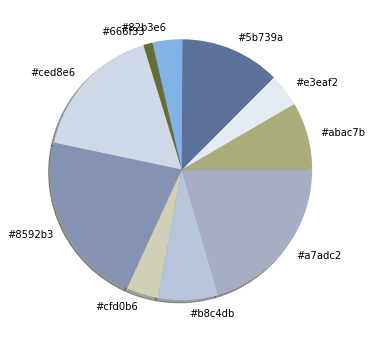

In [12]:
plt.figure(figsize = (8, 6))
plt.pie(count.values(),labels=hex_color,colors=hex_color,shadow=True)

In [13]:
def get_key(val):
    for key,value in count.items():
         if val==value:
            return key
 
    return "key doesn't exist"

In [14]:
# Getting the max. color as our background

label_background=get_key(max(count.values()))
background_color=ordered_color[label_background]
hex_color_background=rgb2hex(background_color)
hex_color_background

'#8592b3'

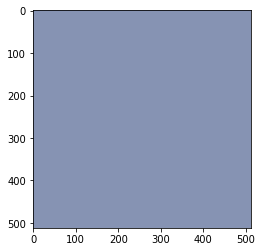

In [15]:
#showing our background in the form of an image.

bg=np.zeros((512,512,3),np.uint8)
bg_color=cv2.rectangle(bg,(0,0),(512,512),background_color,-1)
plt.imshow(bg_color)